# XGBoost On Boston Housing

## 1.Import

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import seaborn as sns

## 2.Load Data

In [2]:
# Resolve project paths and organize outputs
PROJECT_ROOT = Path.cwd()
if not (PROJECT_ROOT / "datasets").exists() and (PROJECT_ROOT.parent / "datasets").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent
if not (PROJECT_ROOT / "datasets").exists():
    raise FileNotFoundError("Could not locate datasets folder. Run from project root or src directory.")

DATA_DIR = PROJECT_ROOT / "datasets" / "boston-housing"
OUTPUT_DIR = PROJECT_ROOT / "outputs"
PLOTS_DIR = OUTPUT_DIR / "plots"
MODELS_DIR = OUTPUT_DIR / "models"
PREDICTIONS_DIR = OUTPUT_DIR / "predictions"
for path in [OUTPUT_DIR, PLOTS_DIR, MODELS_DIR, PREDICTIONS_DIR]:
    path.mkdir(parents=True, exist_ok=True)

print(f"Project root: {PROJECT_ROOT}")
print(f"Outputs directory: {OUTPUT_DIR}")

Project root: d:\学习资料\数据挖掘\data-mining
Outputs directory: d:\学习资料\数据挖掘\data-mining\outputs


In [3]:
data_path = DATA_DIR / "HousingDataPreprocessed.csv"
df = pd.read_csv(data_path, sep=",")
features_list = list(df.columns)
features_list.remove('MEDV')
X = df[features_list]
Y = df['MEDV']

In [4]:
X['CHAS'] = X['CHAS'].astype('bool')

C:\Users\MSI_NB\AppData\Local\Temp\ipykernel_32416\578400245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CHAS'] = X['CHAS'].astype('bool')


## 3. 5 Fold Cross Verification

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,)

In [6]:
!pip install scikit-optimize -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
'''from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

search_spaces = {
            'n_estimators': Integer(1100, 1400),
            'max_depth': Integer(2, 5),
            'subsample': Real(0.5, 0.7),
            'colsample_bytree': Real(0.65, 0.85),
            'gamma': Real(0, 5),
            'reg_alpha': Real(1e-12, .1, 'log-uniform'),
            'reg_lambda': Real(1e-12, .1, 'log-uniform'),

    }
        

base_model = xgb.XGBRegressor(
    random_state=20251204,
    n_jobs=-1,
    verbosity=1,
    learning_rate=0.01,
    min_child_weight = 1,
)
    
bayes_search = BayesSearchCV(
    estimator=base_model,
    search_spaces=search_spaces,
    n_iter=240,
    cv=5,  # 5折交叉验证
    scoring='neg_mean_squared_error',
    random_state=20251204,
    n_jobs=-1,
    verbose=1,
)
        
# 执行搜索
bayes_search.fit(X_train, Y_train)


# 保存结果
model = bayes_search.best_estimator_
best_params = bayes_search.best_params_
search_results = bayes_search

print("\n" + "=" * 60)
print("贝叶斯优化结果")
print("=" * 60)
print(f"最佳参数: {best_params}")
print(f"最佳交叉验证分数 (MSE): {-bayes_search.best_score_:.4f}")
'''


'from skopt import BayesSearchCV\nfrom skopt.space import Real, Integer, Categorical\n\nsearch_spaces = {\n            \'n_estimators\': Integer(1100, 1400),\n            \'max_depth\': Integer(2, 5),\n            \'subsample\': Real(0.5, 0.7),\n            \'colsample_bytree\': Real(0.65, 0.85),\n            \'gamma\': Real(0, 5),\n            \'reg_alpha\': Real(1e-12, .1, \'log-uniform\'),\n            \'reg_lambda\': Real(1e-12, .1, \'log-uniform\'),\n\n    }\n\n\nbase_model = xgb.XGBRegressor(\n    random_state=20251204,\n    n_jobs=-1,\n    verbosity=1,\n    learning_rate=0.01,\n    min_child_weight = 1,\n)\n\nbayes_search = BayesSearchCV(\n    estimator=base_model,\n    search_spaces=search_spaces,\n    n_iter=240,\n    cv=5,  # 5折交叉验证\n    scoring=\'neg_mean_squared_error\',\n    random_state=20251204,\n    n_jobs=-1,\n    verbose=1,\n)\n\n# 执行搜索\nbayes_search.fit(X_train, Y_train)\n\n\n# 保存结果\nmodel = bayes_search.best_estimator_\nbest_params = bayes_search.best_params_\nsearc

最佳参数: OrderedDict([('colsample_bytree', 0.8477197877691871), ('gamma', 2.963020908406329), ('learning_rate', 0.01246022881782795), ('max_depth', 3), ('min_child_weight', 1), ('n_estimators', 995), ('reg_alpha', 1e-08), ('reg_lambda', 1e-08), ('subsample', 0.678350374817612)])
最佳交叉验证分数 (MSE): 9.6028

最佳参数: OrderedDict([('colsample_bytree', 0.681285771749176), ('gamma', 0.0), ('learning_rate', 0.009079813094509085), ('max_depth', 5), ('min_child_weight', 1), ('n_estimators', 1341), ('reg_alpha', 0.1), ('reg_lambda', 1e-12), ('subsample', 0.5)])
最佳交叉验证分数 (MSE): 8.4320

最佳参数: OrderedDict([('colsample_bytree', 0.65), ('gamma', 0.0), ('max_depth', 5), ('n_estimators', 1277), ('reg_alpha', 1e-12), ('reg_lambda', 1e-12), ('subsample', 0.5425450733332463)])
最佳交叉验证分数 (MSE): 8.2611

## Fit and See result

In [44]:
xgb_regressor = xgb.XGBRegressor(
    random_state=20251204,
    n_jobs=-1,
    verbosity=1,
    learning_rate=0.01,
    min_child_weight = 1,
    colsample_bytree=0.65,
    gamma = 0,
    max_depth = 5,
    n_estimators = 1500,
    reg_alpha = 0,
    reg_lambda = 0,
    subsample = 0.55
)

xgb_regressor.fit(X_train,Y_train)
y_pred_train = xgb_regressor.predict(X_train)
y_pred_test = xgb_regressor.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name}集评估结果:")
    print(f"均方误差 (MSE): {mse:.4f}")
    print(f"均方根误差 (RMSE): {rmse:.4f}")
    print(f"平均绝对误差 (MAE): {mae:.4f}")
    print(f"R² 分数: {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

train_metrics = evaluate_model(Y_train, y_pred_train, "训练")
test_metrics = evaluate_model(Y_test, y_pred_test, "测试")


训练集评估结果:
均方误差 (MSE): 0.1371
均方根误差 (RMSE): 0.3703
平均绝对误差 (MAE): 0.3078
R² 分数: 0.9984

测试集评估结果:
均方误差 (MSE): 9.8674
均方根误差 (RMSE): 3.1412
平均绝对误差 (MAE): 2.2387
R² 分数: 0.8846


### Estimating Learning Curve

In [23]:
train_errors = []
test_errors = []

for n_estimator in range(1, 1501, 100):
    model = xgb.XGBRegressor(
        n_estimators=n_estimator,
        random_state=20251204,
        n_jobs=-1,
        verbosity=1,
        learning_rate=0.01,
        min_child_weight = 1,
        colsample_bytree=0.65,
        gamma = 0,
        max_depth = 5,
        reg_alpha = 0,
        reg_lambda = 0,
        subsample = 0.55
    )
    model.fit(X_train, Y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(Y_train, train_pred))
    test_errors.append(mean_squared_error(Y_test, test_pred))

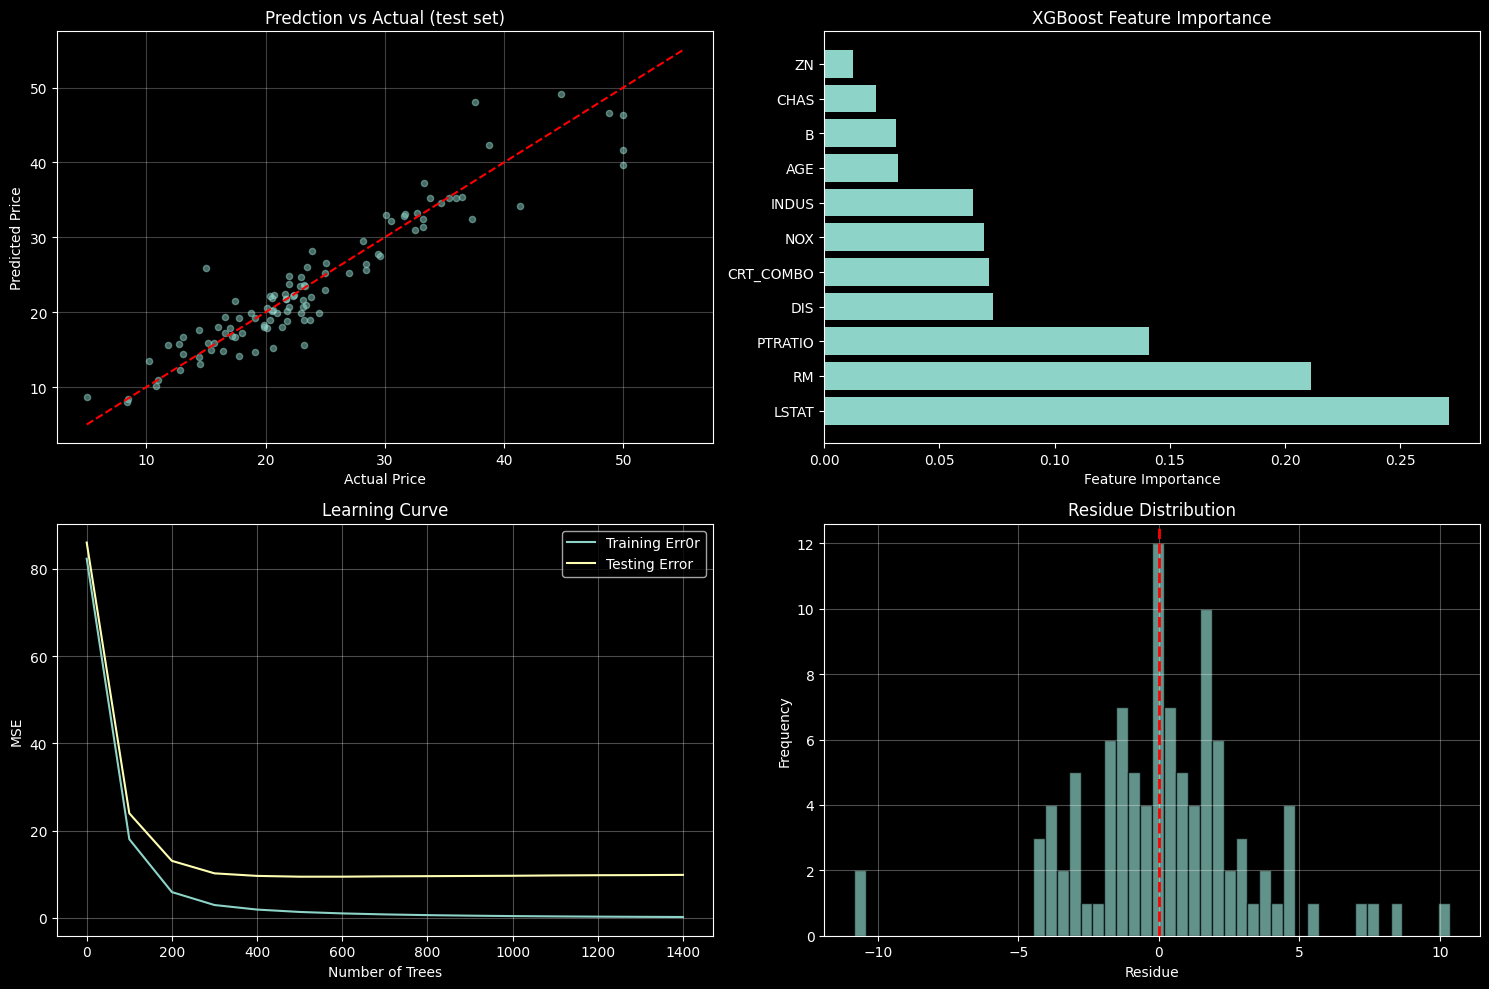

In [45]:
plt.figure(figsize=(15, 10))

# 1. Prediction vs Actual Values
plt.subplot(2,2,1)
plt.scatter(Y_test, y_pred_test, alpha=0.5, s=20)
plt.plot([5,55], [5,55], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predction vs Actual (test set)')
plt.grid(True, alpha=0.25)

# 2. Feature Importance
plt.subplot(2,2,2)
importances = xgb_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()

# 3. Learning Curve
plt.subplot(2, 2, 3)
plt.plot(range(0, 1500, 100), train_errors, label='Training Err0r')
plt.plot(range(0, 1500, 100), test_errors, label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Residue distribution
plt.subplot(2, 2, 4)
residuals = Y_test - y_pred_test
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.title('Residue Distribution')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()